In [1]:
import pysrt
import numpy as np
import pandas as pd
from os import path
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
preprocessed_subtitles = pysrt.open("./preprocessed_sub.txt")
for subtitle in preprocessed_subtitles[:5]:
    print(subtitle)

1
00:01:19,727 --> 00:01:23,356
white storks wanted pick bird

2
00:01:23,567 --> 00:01:26,400
representative birds world

3
00:01:26,447 --> 00:01:29,200
worse pick white stork

4
00:01:29,327 --> 00:01:32,637
marvellous flyer intrepid traveller

5
00:01:33,167 --> 00:01:38,366
pair come africa nest small town bavaria



In [3]:
utterances = [subtitle.text for subtitle in preprocessed_subtitles]
print(utterances[:15])
print(type(utterances[0]))

['white storks wanted pick bird', 'representative birds world', 'worse pick white stork', 'marvellous flyer intrepid traveller', 'pair come africa nest small town bavaria', 'complicated courtship greeting rituals', 'devoted parents', 'stand birds world stork feather', 'seen key crucial bird', 'feather marvellous aerofoil', 'man invent strong weight weight', 'extremely efficient insulator important bird', 'complicated structure', 'feather separate filaments', 'central quill']
<class 'str'>


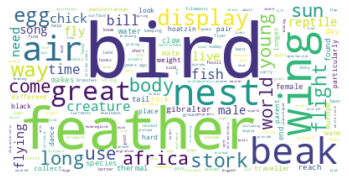

In [9]:
# Create and generate a word cloud image:
text = ' '.join(utterances)
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

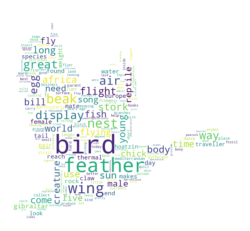

In [8]:
mask = np.array(Image.open("bird.png"))

wordcloud = WordCloud(background_color="white",mask = mask).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text_for_bar = text.split(" ")
counts = Counter(text_for_bar)

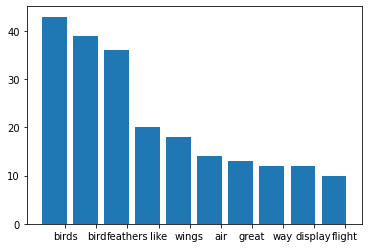

In [24]:
labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

#bar_width = 0.35

n_max = 10
plt.bar(indexes[:n_max], values[:n_max])

# add labels
plt.xticks(indexes[:n_max] + bar_width, labels[:n_max])
plt.show()

In [25]:
print(labels)

['birds' 'bird' 'feathers' ... 'dozen' 'half' 'detura']


In [22]:
#preprocessed_subtitles.save('./preprocessed_sub.txt')